In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('Downloads/processed.cleveland.data',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [17]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg',
             'thalach','exang','oldpeak','slope','ca','thal','hd']

In [18]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Missing Data

In [19]:
df.dtypes # object data type suggests something is not right, object
          # datatype occcurs when there are mixtures of numbers and
          # letters 

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [20]:
print('ca:',df['ca'].unique())
print('thal:',df['thal'].unique())

ca: ['0.0' '3.0' '2.0' '1.0' '?']
thal: ['6.0' '3.0' '7.0' '?']


In [21]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [22]:
df.shape # 303 rows, missing data accounts for around 2% of the total data
         # we're going to delete the six rows cotaining ?

(303, 14)

In [23]:
df_missing_removed = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [24]:
df_missing_removed.shape

(297, 14)

# Formating Data

In [77]:
X = df_missing_removed.drop('hd',axis=1)
y = df_missing_removed['hd'].copy()

Sklearn DT natively support numerical data and doesn't support categorical data 

In [27]:
X['cp'].unique() # In real situation make sure that every column contains the accpeted categories (values) 
                 # use unique to find out

array([1., 4., 3., 2.])

In [78]:
# One-Hot Encoding, Two of the more popular methods get_dummies() (pandas)
# ColumnTransformer() (sklearn) <- this is usely commonly in production

X_encoded = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [33]:
y[y>0] = 1
y.unique()

array([0, 1])

# Model

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)

In [46]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

[Text(483.845,397.421,'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No'),
 Text(280.121,362.863,'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No'),
 Text(170.983,328.304,'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No'),
 Text(123.69,293.746,'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No'),
 Text(72.7586,259.188,'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No'),
 Text(43.6552,224.629,'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No'),
 Text(29.1034,190.071,'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No'),
 Text(14.5517,155.512,'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No'),
 Text(43.6552,155.512,'exang <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(29.1034,120.954,'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(58.2069,120.954,'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = N

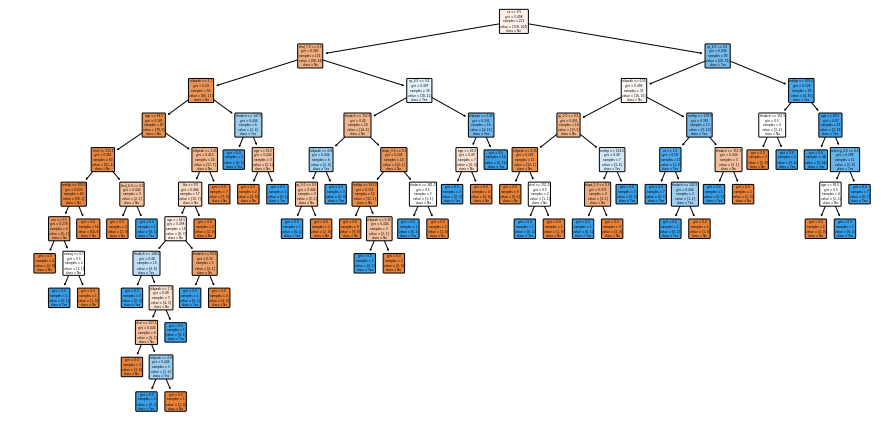

In [43]:
plt.figure(figsize=(15,7.5))
plot_tree(clf,filled=True,rounded=True,class_names=["No","Yes"],feature_names=X_encoded.columns)

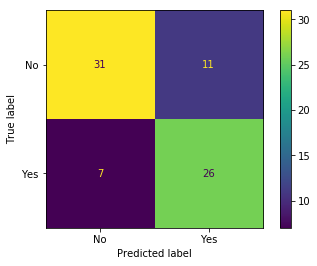

In [41]:
plot_confusion_matrix(clf,X_test,y_test,display_labels=['No','Yes'])

Pruning the DT solves the problem of overfitting, a problem that DT are prone to

# Cost Complexity Pruning 

In [47]:
path = clf.cost_complexity_pruning_path(X_train,y_train) # determine alpha values
alpha_values = path.ccp_alphas
alpha_values = alpha_values[:-1]

clfs = [] # To store classifer for each alpha value

for alpha in alpha_values:
    clf = DecisionTreeClassifier(ccp_alpha=alpha,random_state=0)
    clf.fit(X_train,y_train)
    clfs.append(clf)

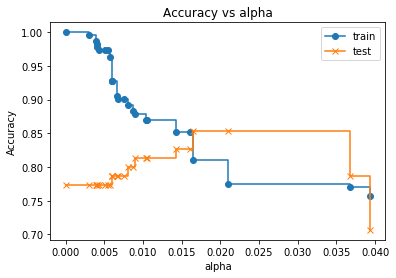

In [48]:
train_scores = [clf.score(X_train,y_train) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha")
ax.plot(alpha_values,train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(alpha_values,test_scores, marker='x',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

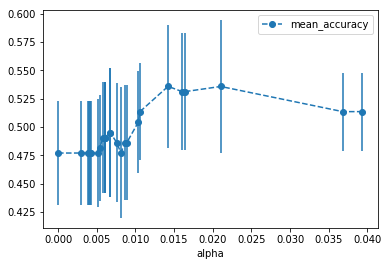

In [80]:
alpha_loop_values = []

for alpha in alpha_values:
    clf = DecisionTreeClassifier(ccp_alpha=alpha,random_state=0)
    scores = cross_val_score(clf,X_train,y_train,cv=5)
    alpha_loop_values.append([alpha,np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')


In [81]:
optimal_alpha_value = alpha_results[(alpha_results['alpha'] > 0.013) & (alpha_results['alpha'] < 0.016)]['alpha']
optimal_alpha_value = float(optimal_alpha_value)

# Final DT

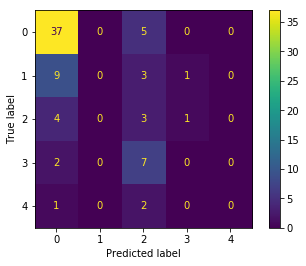

In [84]:
clf_prunned = DecisionTreeClassifier(ccp_alpha=optimal_alpha_value,random_state=42)
clf_prunned.fit(X_train,y_train)

plot_confusion_matrix(clf_prunned,X_test,y_test,display_labels=['0','1','2','3','4'])

[Text(422,362.863,'ca <= 0.5\ngini = 0.653\nsamples = 222\nvalue = [118, 41, 27, 26, 10]\nclass = 0'),
 Text(211,259.188,'thal_7.0 <= 0.5\ngini = 0.423\nsamples = 132\nvalue = [98, 19, 6, 7, 2]\nclass = 0'),
 Text(105.5,155.512,'gini = 0.249\nsamples = 93\nvalue = [80, 9, 4, 0, 0]\nclass = 0'),
 Text(316.5,155.512,'thalach <= 129.0\ngini = 0.684\nsamples = 39\nvalue = [18, 10, 2, 7, 2]\nclass = 0'),
 Text(211,51.8375,'gini = 0.531\nsamples = 8\nvalue = [1, 0, 0, 5, 2]\nclass = 3'),
 Text(422,51.8375,'gini = 0.587\nsamples = 31\nvalue = [17, 10, 2, 2, 0]\nclass = 0'),
 Text(633,259.188,'oldpeak <= 0.9\ngini = 0.784\nsamples = 90\nvalue = [20, 22, 21, 19, 8]\nclass = 1'),
 Text(527.5,155.512,'gini = 0.692\nsamples = 39\nvalue = [18, 10, 4, 5, 2]\nclass = 0'),
 Text(738.5,155.512,'gini = 0.743\nsamples = 51\nvalue = [2, 12, 17, 14, 6]\nclass = 2')]

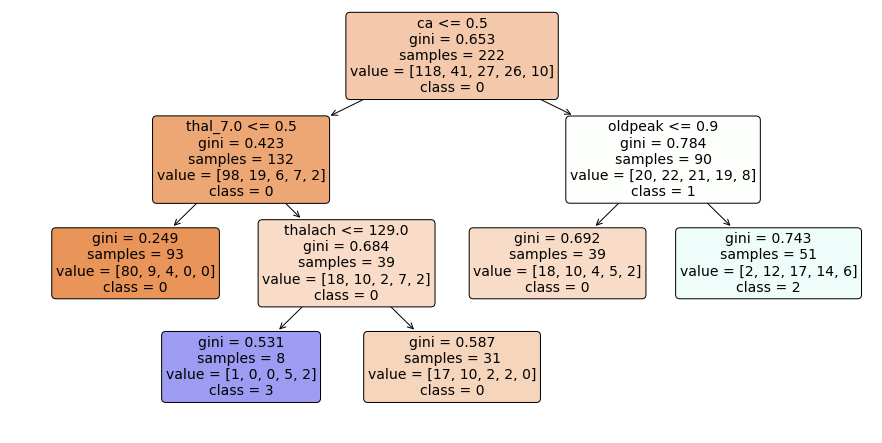

In [88]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_prunned,filled=True,rounded=True,class_names=['0','1','2','3','4'],feature_names=X_encoded.columns)

3